# Malkus-Lorenz wheel

You can get details in [My website](https://munjungkim.github.io/post/lorenz_wheel/)

Here, we are going to solve the Lorenz equation of Malkus-wheel with RK-4 (4th order Runge-Kutta)

-----

$w(t)$ : angular velocity of the water wheel

$\theta$ : angular velocity of the water wheel

$Q(\theta)$ : The rate at which water is pumped in. (Note : This function is independent with time $t$.

$r$ : radius of the wheel

$m(\theta,t)$ : mass distribution of water around rim

-----

and after some calculation (see the website), we have to calcualate


----
$\dot{a_1} : -Ka_1 + wb_1$

$\dot{b_1} : q_1 - Kb_1 - wa_1$

$I\dot{w} = -vw + gra_1\pi$

----

where $a_n(t)$ and $b_n(t)$ are coefficients of the fourier series of $m(\theta,t)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Malkus_function import Malkus
from RK4 import *
from Lorenz_function import Lorenz
from tqdm import tqdm

# Lorenz system

In [23]:
p_list_malkus= RK4_3variable(1,1,1,Lorenz(r=25).Lorenz_func,0.01,3000)

In [24]:
p_list_malkus[0]

array([[ 1.        ,  1.01111457,  1.04315002, ..., -8.93400364,
        -8.34776089, -7.76973738],
       [ 1.        ,  1.22982526,  1.4626986 , ..., -3.05843271,
        -2.51298076, -2.05637048],
       [ 1.        ,  0.98473231,  0.97244717, ..., 31.27696415,
        30.69082762, 30.06431871]])

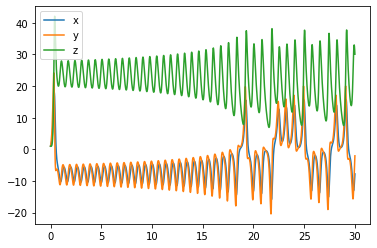

In [25]:
plt.plot(p_list_malkus[1],p_list_malkus[0][0],label='x')
plt.plot(p_list_malkus[1],p_list_malkus[0][1],label='y')
plt.plot(p_list_malkus[1],p_list_malkus[0][2],label='z')
plt.legend()


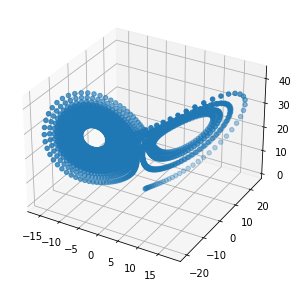

In [31]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0][0,:],p_list_malkus[0][1,:],p_list_malkus[0][2,:])

# Malkus-wheel

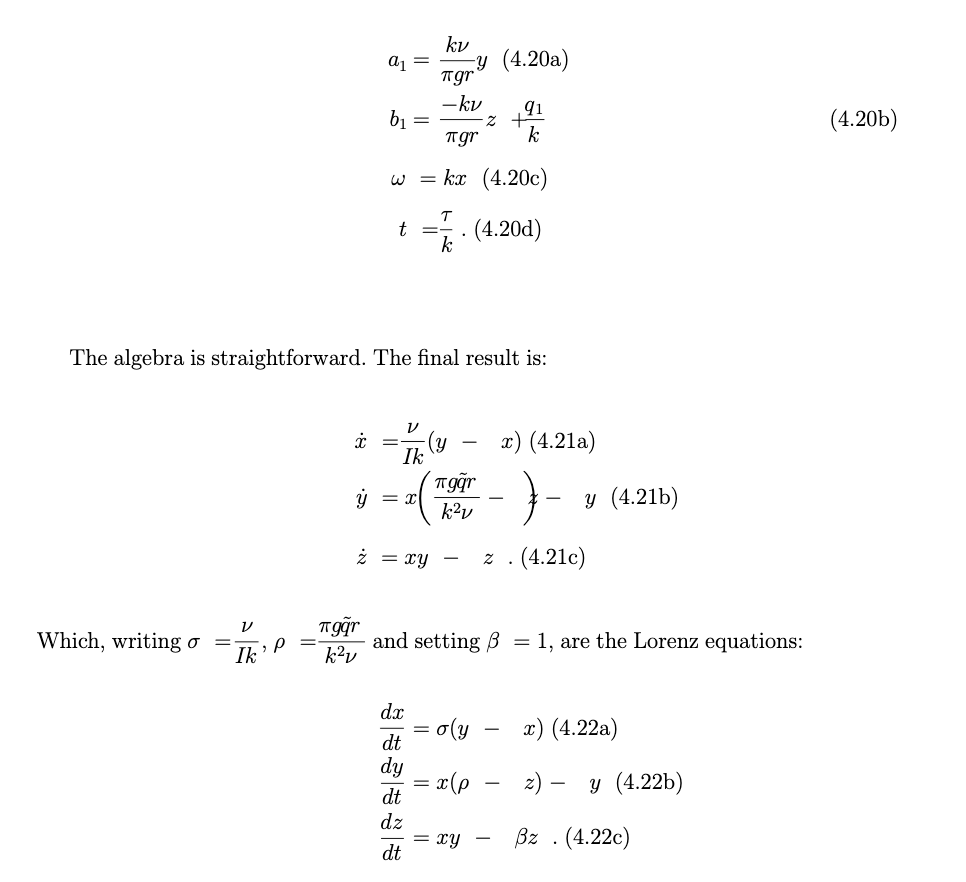

In [34]:
K = 0.2
v = 0.1
r = 0.02
I = 0.1

In [39]:
s = v/I/K
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

bifurcation point should be 15.0


In [41]:
print(np.pi*9.8*r*np.linspace(0,1,100)/(K**2)/v)

[  0.           1.5549297    3.10985939   4.66478909   6.21971879
   7.77464849   9.32957818  10.88450788  12.43943758  13.99436728
  15.54929697  17.10422667  18.65915637  20.21408606  21.76901576
  23.32394546  24.87887516  26.43380485  27.98873455  29.54366425
  31.09859394  32.65352364  34.20845334  35.76338304  37.31831273
  38.87324243  40.42817213  41.98310183  43.53803152  45.09296122
  46.64789092  48.20282061  49.75775031  51.31268001  52.86760971
  54.4225394   55.9774691   57.5323988   59.08732849  60.64225819
  62.19718789  63.75211759  65.30704728  66.86197698  68.41690668
  69.97183638  71.52676607  73.08169577  74.63662547  76.19155516
  77.74648486  79.30141456  80.85634426  82.41127395  83.96620365
  85.52113335  87.07606304  88.63099274  90.18592244  91.74085214
  93.29578183  94.85071153  96.40564123  97.96057093  99.51550062
 101.07043032 102.62536002 104.18028971 105.73521941 107.29014911
 108.84507881 110.4000085  111.9549382  113.5098679  115.0647976
 116.619727

In [45]:
bifurcate_w = []
q_list = np.linspace(0,1,100)
for q in tqdm(q_list):
    p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=q).malkus,0.01,1000)[0]
    bifurcate_w.append(p_list_malkus[2,1000])

100%|██████████| 100/100 [00:02<00:00, 42.54it/s]


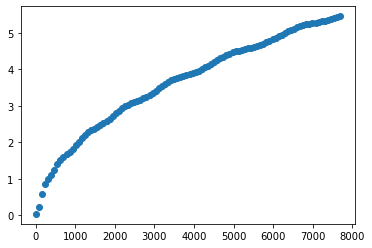

In [46]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,10,100)/(K**2)/v,bifurcate_w)

In [20]:
p_list_malkus= RK4_3variable(0,0,0.5,Malkus(0.15).malkus,0.01,1000)[0]

In [21]:
p_list_malkus

array([[0.00000000e+00, 3.73129135e-06, 1.48506648e-05, ...,
        7.64723278e-02, 7.63476734e-02, 7.62203151e-02],
       [0.00000000e+00, 1.49625004e-03, 2.98500056e-03, ...,
        1.23537790e-02, 1.21897032e-02, 1.20286015e-02],
       [5.00000000e-01, 4.98751657e-01, 4.97507003e-01, ...,
        2.09719848e+00, 2.09783590e+00, 2.09846205e+00]])

In [22]:
import pylab
from mpl_toolkits import mplot3d

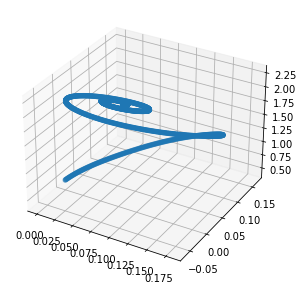

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0,:],p_list_malkus[1,:],p_list_malkus[2,:])

In [70]:
bifurcate_w = []
for q in np.linspace(0,100,200):
    I = (q/K)**2 + 1*(r**2)
    p_list_malkus= RK4_calculator(q,1,1,0,malkus_a,malkus_b,malkus_w,0.001,10000,K,I,v,r)[0]
    bifurcate_w.append(p_list_malkus[2,10000])

KeyboardInterrupt: 

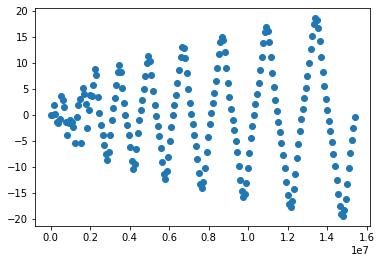

In [68]:
plt.scatter(np.linspace(0,100000,200)*(r**2)*9.8*np.pi/(K**2)/v,bifurcate_w)

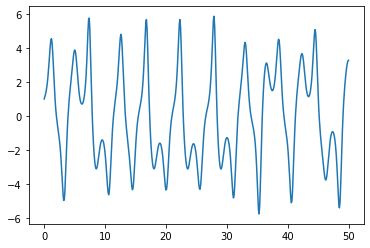

In [58]:
p_list_malkus,t= RK4_calculator(5,1,1,1,malkus_a,malkus_b,malkus_w,0.1,500,K,I,v,r)
plt.plot(t,p_list_malkus[2,:])

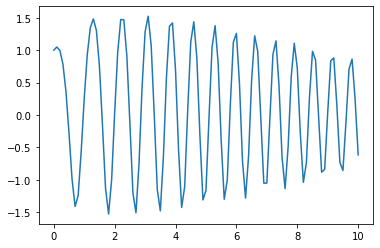

In [4]:
plt.plot(t,p_list_malkus[1,:])

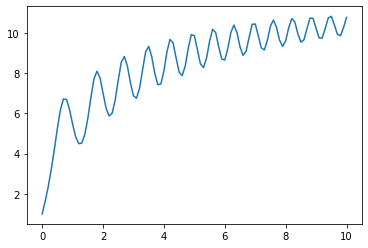

In [5]:
plt.plot(t,p_list_malkus[2,:])

In [9]:
import numpy as np

samplerate = 44100 #Frequecy in Hz

def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

# To get a 1 second long wave of frequency 440Hz
a_wave = get_wave(440, 1)

#wave features
print(len(a_wave)) # 44100
print(np.max(a_wave)) # 4096
print(np.min(a_wave)) # -4096

44100
4095.9996855891045
-4095.999685589104


In [14]:
from pprint import pprint

def get_piano_notes():

    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 261.63 #Frequency of Note C4
    
    note_freqs = {octave[i]: base_freq * pow(2,(i/12)) for i in range(len(octave))}        
    note_freqs[''] = 0.0 # silent note
    
    return note_freqs
  
  # To get the piano note's frequencies
note_freqs = get_piano_notes()
pprint(note_freqs)

{'': 0.0,
 'A': 440.00745824565865,
 'B': 493.8916728538229,
 'C': 261.63,
 'D': 293.66974569918125,
 'E': 329.63314428399565,
 'F': 349.2341510465061,
 'G': 392.0020805232462,
 'a': 466.1716632541139,
 'c': 277.18732937722245,
 'd': 311.1322574981619,
 'f': 370.00069432367286,
 'g': 415.31173722644}


In [17]:
import numpy as np

def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() # Function that we made earlier
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

music_notes = 'C-C-G-G-A-A-G-F-F-E-E-D-D-C-G-G-F-F-E-E-D-G-G-F-F-E-E-D-C-C-G-G-A-A-G-F-F-E-E-D-D-C'
data = get_song_data(music_notes)

data = data * (16300/np.max(data)) # Adjusting the Amplitude (Optional)

In [18]:
from scipy.io.wavfile import write
write('twinkle-twinkle.wav', samplerate, data.astype(np.int16))